## Exploratoy Data Analysis

NOTE: Before concating the dataframes, it is necessary to add a timeleft category to completed sales.

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import seaborn as sns

%matplotlib inline

In [100]:
active_sales = pd.read_csv('./cleaned_csv_3_1', index_col=0)
completed_sales = pd.read_csv('./cleaned_completed_3_4', index_col=0)

In [101]:
#adding timeLeft column to completed sales, with 0 value
completed_sales['timeLeft'] = pd.Timedelta(0)

In [102]:
#fixing time deltas
deltas = []
for val in active_sales['timeLeft']:
    time = val[:-10]
    deltas.append(pd.Timedelta(time))

active_sales['timeLeft'] = deltas

In [103]:
#merged dataframe
df = pd.concat([active_sales, completed_sales], axis=0)

In [104]:
df.shape

(14900, 29)

In [105]:
#Converting to datetime 
df['startTime'] = pd.to_datetime(df['startTime'])
df['endTime'] = pd.to_datetime(df['endTime'])

In [106]:
df.columns

Index(['URLTitle', 'autoPay', 'bestOfferEnabled', 'bidCount',
       'buyItNowAvailable', 'buyItNowPrice', 'categoryId', 'country',
       'currencyid_conv', 'current_currency', 'current_price', 'endTime',
       'expeditedShipping', 'handlingTime', 'itemId', 'listingType',
       'location', 'paymentMethod', 'postalCode', 'productId',
       'returnsNotAccepted', 'shippingType', 'shipping_cost', 'startTime',
       'timeLeft', 'title', 'topRatedListing', 'value_conv', 'watchCount'],
      dtype='object')

In [107]:
#Removing 143 duplicate entries
print(df.loc[df.duplicated()].shape)
df = df.drop_duplicates()

(143, 29)


In [108]:
#3036 of the 14900 sales are auctions 
df.loc[df['listingType'] =='Auction'].shape

(3036, 29)

Text(0.5,0,'Number of Bids in Auctions')

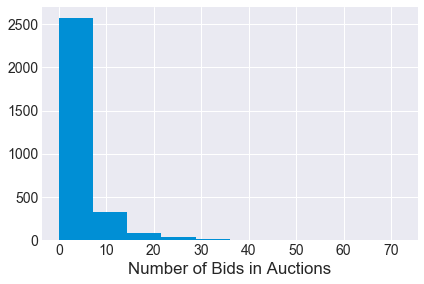

In [109]:
plt.style.use('fivethirtyeight')
sns.set_style('darkgrid')
df.loc[df['listingType'] =='Auction']['bidCount'].hist()
plt.xlabel('Number of Bids in Auctions')

Number of Auctions by Listing Type 
 StoreInventory    10145
Auction            3036
FixedPrice         1425
AuctionWithBIN      151
Name: listingType, dtype: int64


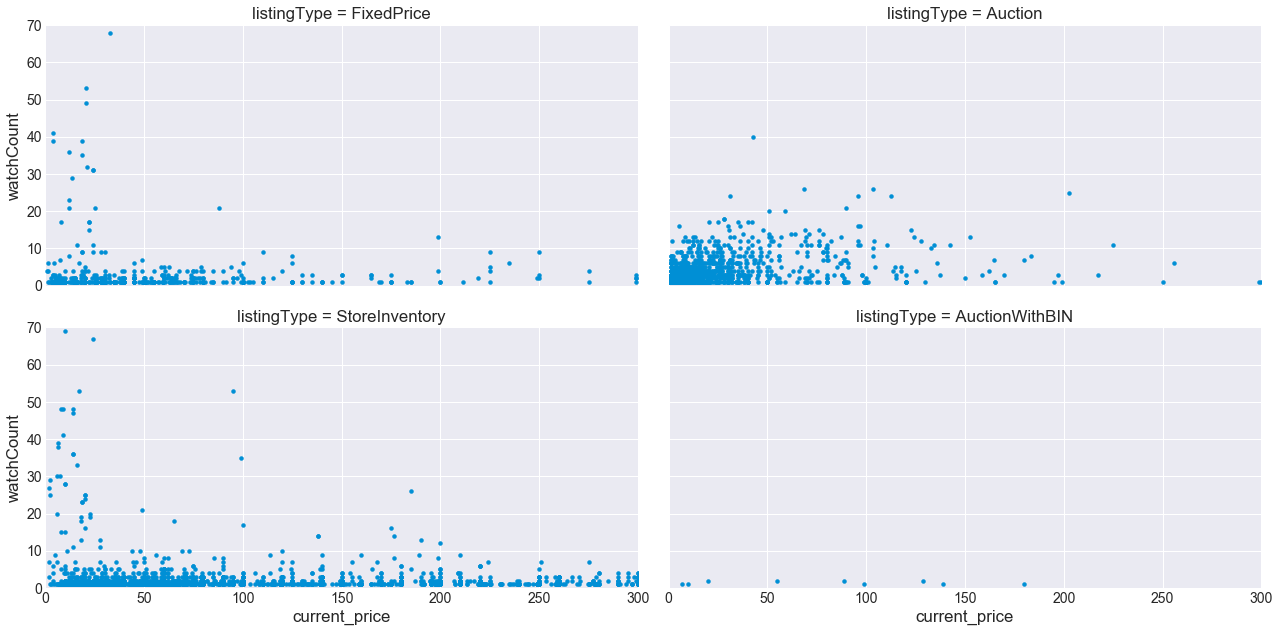

In [110]:
#what is the relationship between watchcount and current price? 
print('Number of Auctions by Listing Type', '\n', df['listingType'].value_counts())
df.pipe(sns.FacetGrid, col='listingType', col_wrap=2,
       aspect=2, size=4.5).map(plt.scatter, 'current_price',
                             'watchCount', s=15)
plt.ylim(0, 70)
plt.xlim(0, 300)
plt.tight_layout()

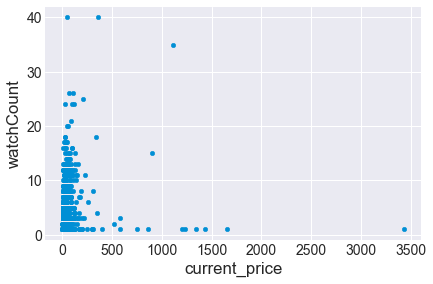

In [111]:
df.loc[df['listingType'] == 'Auction'].plot('current_price', 'watchCount', kind='scatter')

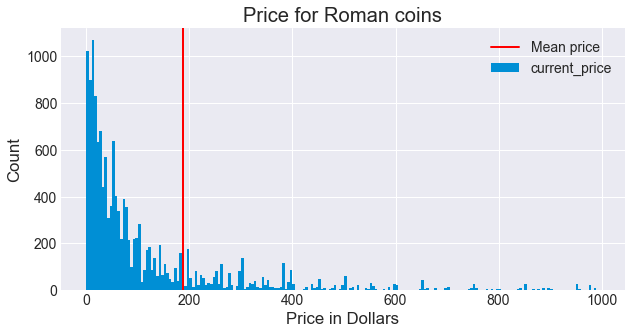

In [129]:
fig, ax = plt.subplots(figsize=(9, 4.5))
bins = np.arange(0, 1000, 5)
ax = ax.hist(df['current_price'], bins=bins)
plt.xlabel('Price in Dollars')
plt.ylabel('Count')
plt.title('Price for Roman coins')
plt.axvline(df['current_price'].mean(), lw=2, c='red', label = 'Mean price')
plt.legend()

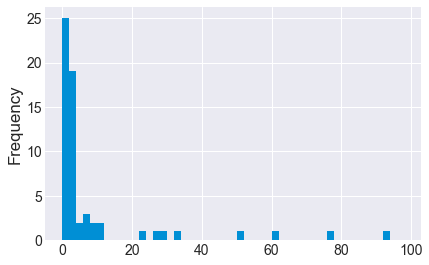

In [140]:
df['watchCount'].value_counts(dropna=False).plot(kind='hist', bins=np.arange(0, 100, 2))